# LA Rent Analysis During Wildfires

## About the Dataset

This dataset tracks rental price changes during the Los Angeles wildfires, documenting potential price gouging incidents. The data was collected from public posts on Twitter/X shared by @DealinRugs in January 2025, with all personal information redacted to protect privacy.


| Column | Description | Type |
|--------|-------------|------|
| submission_date | Date record was submitted to system | Date |
| property_id | Unique property identifier | Integer |
| address | Property street address | String |
| city | Property city location | String |
| state | Property state (2-letter code) | String |
| zip | Property ZIP code | String |
| previous_rent | Prior monthly rent amount | Float |
| current_rent | Current monthly rent amount | Float |
| increase_date | Date rent increase takes effect | Date |
| previous_rent_date | Date of last rent change | Date |
| listing_platform | Platform where property is listed | String |
| notes | Additional property information | Text |

In [38]:
# !pip install -r requirements.txt

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport
from datetime import datetime
import os
import re

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
%matplotlib inline

In [40]:
dataset_path = os.path.join("data", "LA_Fire_PriceGouging.csv")
df = pd.read_csv(dataset_path)

In [41]:
# data overview
display(df.head())
display(df.tail())
display(df.info())
display(df.describe())

,submission_date,property_id,address,city,state,zip,previous_rent,current_rent,increase_date,previous_rent_date,listing_platform,notes
0,2025-01-11 22:32:37.013,4272007003,1812 Navy Street,Santa Monica,CA,90045,12750.0,28000.0,NaN,NaN,Zillow,NaN
1,2025-01-11 23:12:02.851,4260028003,11708 exposition blvd,Los Angeles,Ca,90064,5000.0,7000.0,NaN,NaN,Zillow,Says it’s listed by owner. Was $5000 at the en...
2,2025-01-11 23:18:45.222,4494010023,716 Rochedale Way,Los Angeles,CA,90049,8995.0,12000.0,NaN,NaN,Zillow,NaN
3,2025-01-11 23:23:45.425,5429020022,3512 Crestmont Ave,Los Angeles,CA,90026,9000.0,11000.0,NaN,NaN,Zillow,22% increase from the listing posted on 10/19/24
4,2025-01-11 23:30:06.232,5560025007,8966 Shoreham Dr,Los Angeles,CA,90069,8500.0,11500.0,NaN,NaN,Zillow,"Listing removed on 11/6/24 at $8,500, relisted..."


,submission_date,property_id,address,city,state,zip,previous_rent,current_rent,increase_date,previous_rent_date,listing_platform,notes
1304,2025-01-17 15:16:44.484,2156021113,18730 Hatteras St UNIT 49,Tarzana,CA,91356,3650.0,7500.0,NaN,NaN,Zillow,NaN
1305,2025-01-17 16:11:59.265,5771018012,1235 Highland Oaks Drive,Arcadia,CA,91006,5495.0,6250.0,NaN,NaN,Zillow,Now listed as for sale. Altadena fire refugees...
1306,2025-01-17 16:24:21.890,5648029001,1740 Cielito Dr,glendale,CA,91207,12500.0,19000.0,NaN,NaN,Zillow,NaN
1307,2025-01-17 19:15:26.785,NaN,1632 Micheltorena St,Los Angeles,CA,90026,2495.0,10000.0,NaN,NaN,Zillow,NaN
1308,2025-01-18 10:53:24.339,Na,120 1/2 Galleon,Marina Del Rey,CA,90292,10500.0,20000.0,NaN,NaN,Zillow,On 1/9/2925 price jumps from 10k to 15k. We ar...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   submission_date     1309 non-null   object 
 1   property_id         916 non-null    object 
 2   address             1308 non-null   object 
 3   city                1309 non-null   object 
 4   state               1309 non-null   object 
 5   zip                 1309 non-null   int64  
 6   previous_rent       1307 non-null   float64
 7   current_rent        1307 non-null   float64
 8   increase_date       0 non-null      float64
 9   previous_rent_date  0 non-null      float64
 10  listing_platform    1305 non-null   object 
 11  notes               449 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 122.8+ KB


None

,zip,previous_rent,current_rent,increase_date,previous_rent_date
count,1309.000000,1.307000e+03,1.307000e+03,0.0,0.0
mean,90316.849503,1.430822e+04,2.071249e+04,NaN,NaN
std,4211.670328,5.455263e+04,7.688201e+04,NaN,NaN
min,3500.000000,1.000000e+00,1.000000e+03,NaN,NaN
25%,90046.000000,3.995000e+03,5.500000e+03,NaN,NaN
50%,90210.000000,7.850000e+03,1.050000e+04,NaN,NaN
75%,91206.000000,1.400000e+04,2.000000e+04,NaN,NaN
max,94928.000000,1.510000e+06,2.174900e+06,NaN,NaN


In [42]:
# EDA report
profile = ProfileReport(df, title="BigBasket EDA Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# Save the report to a htlm file
profile.to_file("la_price_gouging_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset Overview:
-----------------
Total reports: 1309
Date range: 2025-01-11 22:32:37.013000 to 2025-01-18 10:53:24.339000

Summary Statistics:
       previous_rent  current_rent  price_increase_pct
count   1.307000e+03  1.307000e+03        1.306000e+03
mean    1.430822e+04  2.071249e+04        1.974839e+04
std     5.455263e+04  7.688201e+04        2.436654e+05
min     1.000000e+00  1.000000e+03       -3.529000e+01
25%     3.995000e+03  5.500000e+03        1.667000e+01
50%     7.850000e+03  1.050000e+04        2.810500e+01
75%     1.400000e+04  2.000000e+04        5.015000e+01
max     1.510000e+06  2.174900e+06        6.499900e+06


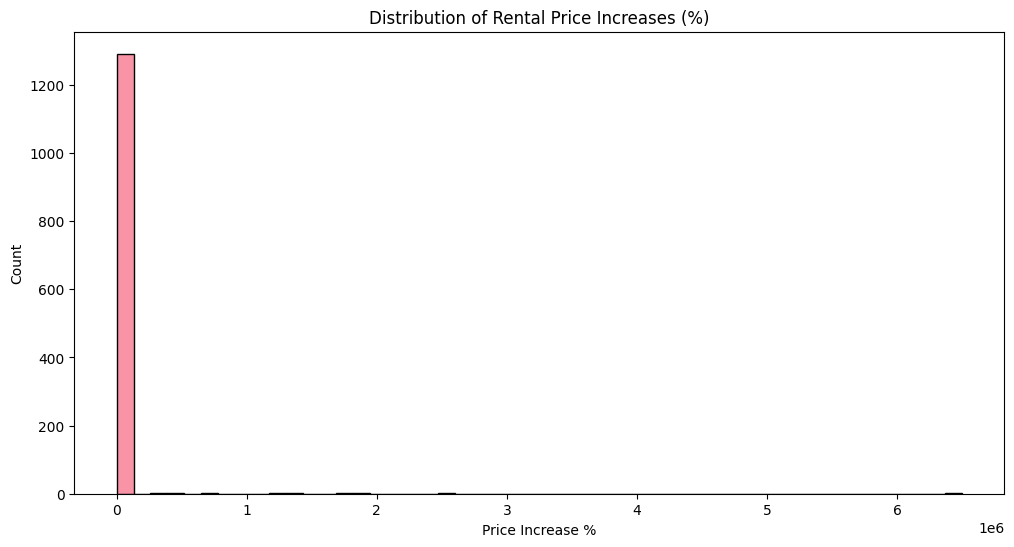

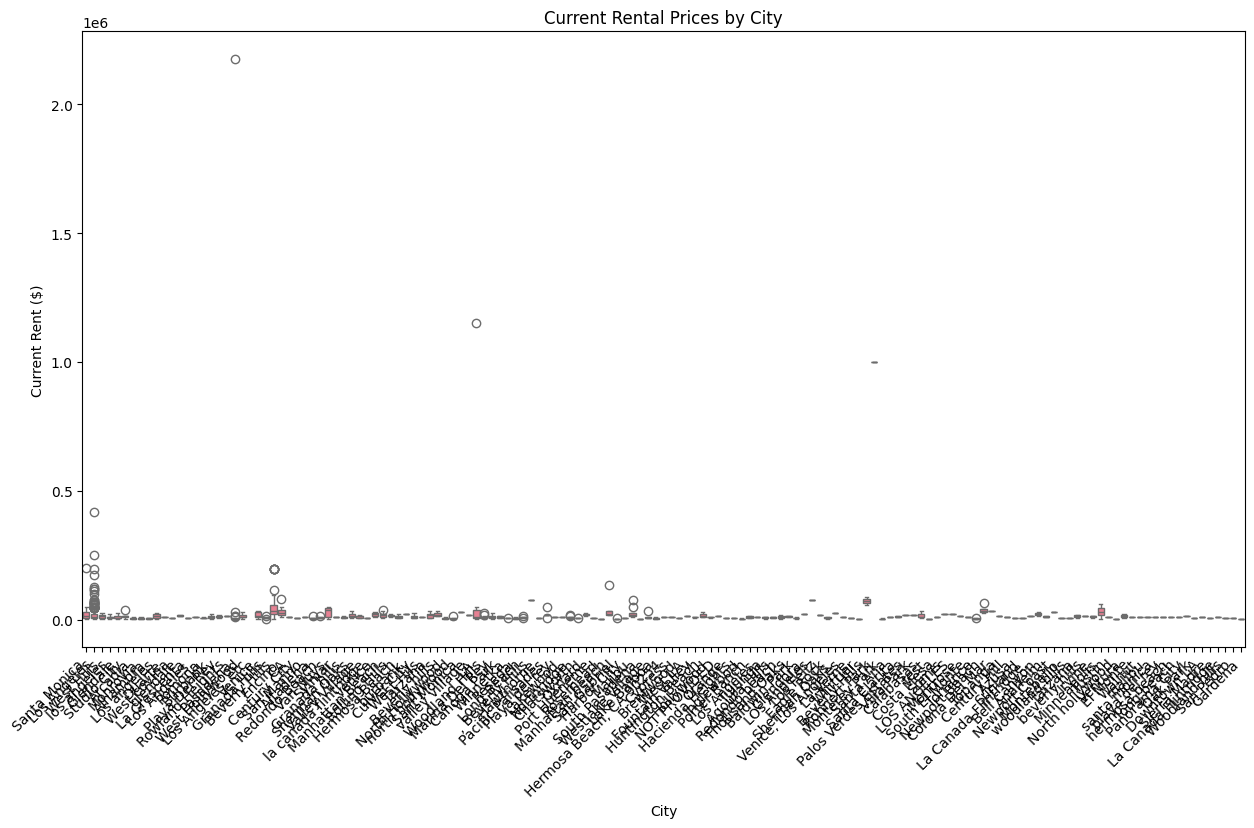

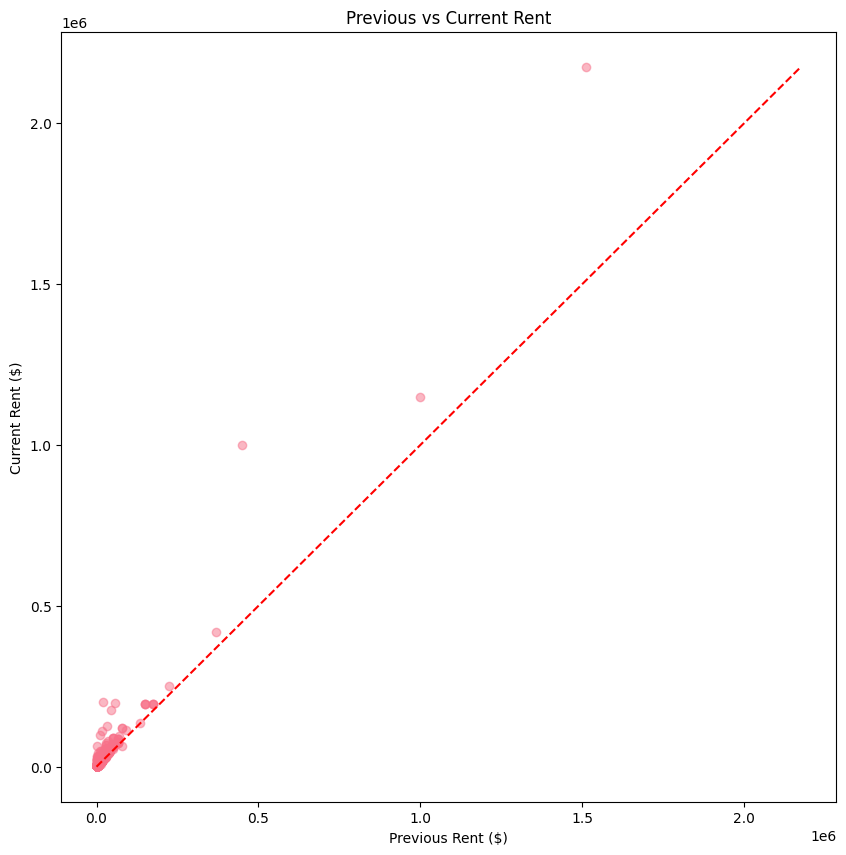

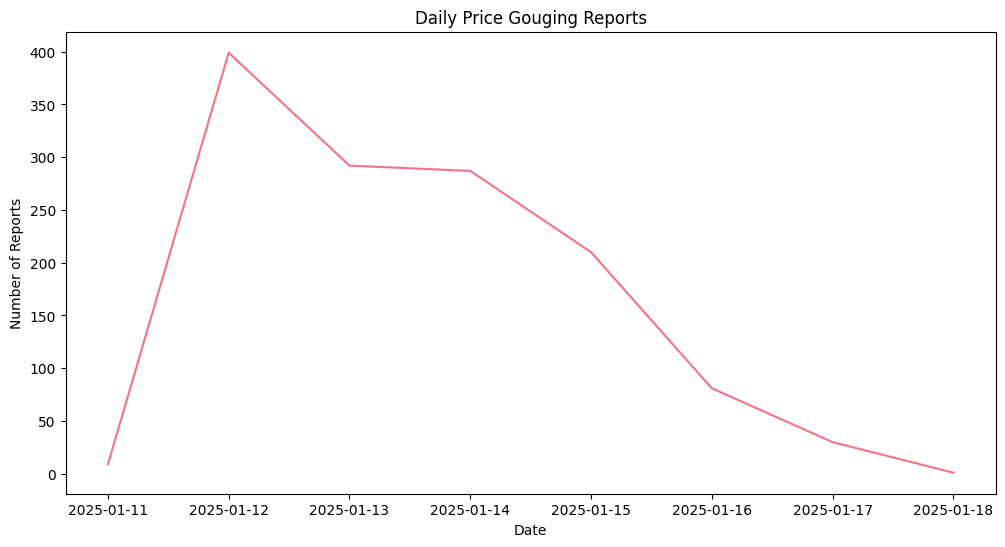


Top 10 ZIP Codes by Average Price Increase:
      price_increase_pct       current_rent
                    mean count         mean
zip                                        
93041          679900.00     1      6800.00
91304          500032.55    10     14270.00
90043          433311.77     3      9666.67
91325          280005.34     5      9080.00
90505          233318.54     3      4665.00
90023          149957.14     2      3500.00
90034          121959.05    16      9386.50
90033           99916.52     5      3179.00
90210           90335.37    72     57623.79
90035           62953.90    27     11659.52


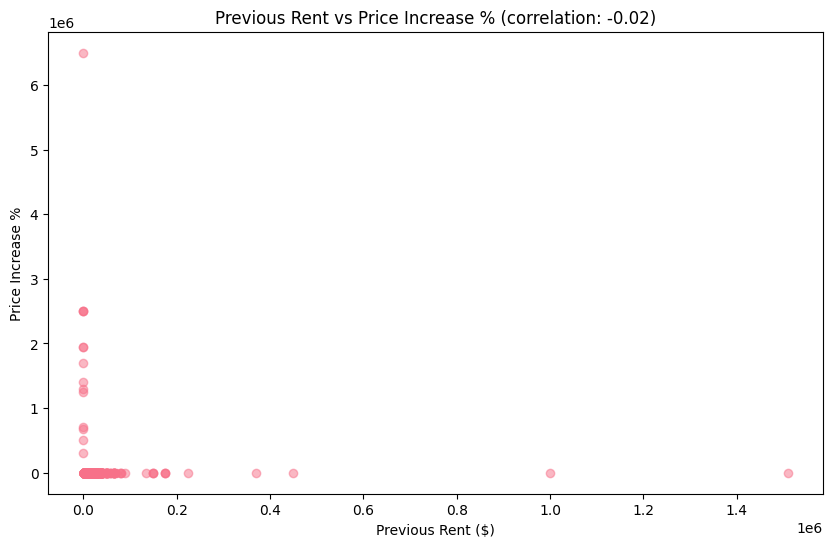


Summary by Listing Platform:
                                                   price_increase_pct        \
                                                                 mean count   
listing_platform                                                              
Airbnb                                                          30.78     1   
Apartments.com and Prime West Management site                   30.00     1   
Apartments.com and redoakprop.com                               41.30     1   
C.L.A.W MLS #25-477907                                          87.50     1   
Compass                                                         48.24    22   
Compass.com                                                     30.42     2   
Craigslist                                                       4.97     1   
Excell doc with agent listings:                                 42.86     1   
Facebook                                                         9.80     1   
I am a tenant and rece

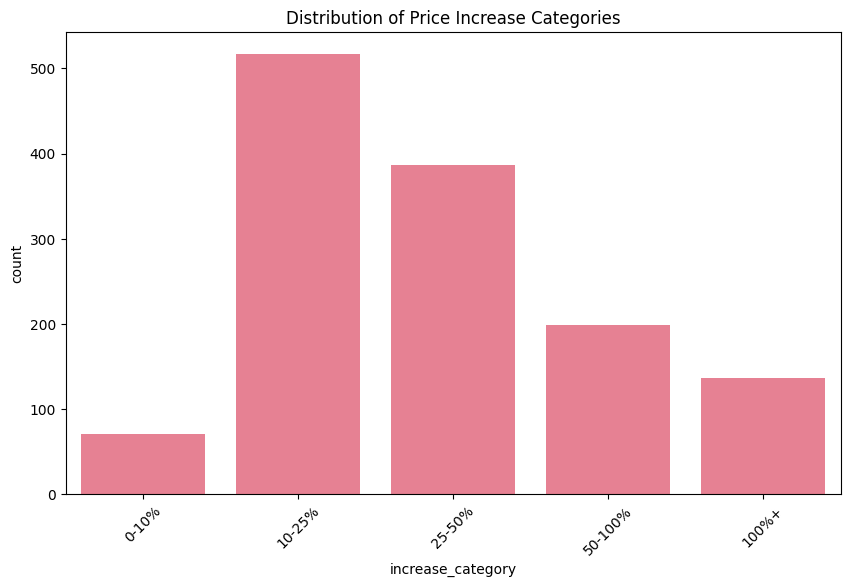

In [44]:
# Convert date columns to datetime
df['submission_date'] = pd.to_datetime(df['submission_date'])

# Calculate price increase percentage
df['price_increase_pct'] = ((df['current_rent'] - df['previous_rent']) / df['previous_rent'] * 100).round(2)

# Basic summary statistics
print("Dataset Overview:")
print("-----------------")
print(f"Total reports: {len(df)}")
print(f"Date range: {df['submission_date'].min()} to {df['submission_date'].max()}")
print("\nSummary Statistics:")
print(df[['previous_rent', 'current_rent', 'price_increase_pct']].describe())

# Create visualizations

# 1. Distribution of Price Increases
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price_increase_pct', bins=50)
plt.title('Distribution of Rental Price Increases (%)')
plt.xlabel('Price Increase %')
plt.ylabel('Count')
plt.show()

# 2. Box plot of rents by city
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='city', y='current_rent')
plt.xticks(rotation=45, ha='right')
plt.title('Current Rental Prices by City')
plt.xlabel('City')
plt.ylabel('Current Rent ($)')
plt.show()

# 3. Scatter plot of previous vs current rent
plt.figure(figsize=(10, 10))
plt.scatter(df['previous_rent'], df['current_rent'], alpha=0.5)
plt.plot([0, df['current_rent'].max()], [0, df['current_rent'].max()], 'r--') # 45-degree line
plt.title('Previous vs Current Rent')
plt.xlabel('Previous Rent ($)')
plt.ylabel('Current Rent ($)')
plt.show()

# 4. Time series of submissions
daily_submissions = df.groupby(df['submission_date'].dt.date).size()
plt.figure(figsize=(12, 6))
daily_submissions.plot()
plt.title('Daily Price Gouging Reports')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.show()

# 5. ZIP code analysis
zip_summary = df.groupby('zip').agg({
    'price_increase_pct': ['mean', 'count'],
    'current_rent': 'mean'
}).round(2)

print("\nTop 10 ZIP Codes by Average Price Increase:")
print(zip_summary.sort_values(('price_increase_pct', 'mean'), ascending=False).head(10))

# 6. Correlation between base rent and increase percentage
correlation = df['previous_rent'].corr(df['price_increase_pct'])
plt.figure(figsize=(10, 6))
plt.scatter(df['previous_rent'], df['price_increase_pct'], alpha=0.5)
plt.title(f'Previous Rent vs Price Increase % (correlation: {correlation:.2f})')
plt.xlabel('Previous Rent ($)')
plt.ylabel('Price Increase %')
plt.show()

# 7. Platform analysis 
platform_summary = df.groupby('listing_platform').agg({
    'price_increase_pct': ['mean', 'count', 'std'],
    'current_rent': 'mean'
}).round(2)

print("\nSummary by Listing Platform:")
print(platform_summary)

# 8. Statistical test for significance of increases
t_stat, p_value = stats.ttest_rel(df['current_rent'], df['previous_rent'])
print(f"\nPaired t-test results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")

# 9. Price increase categories
def categorize_increase(pct):
    if pct <= 10:
        return '0-10%'
    elif pct <= 25:
        return '10-25%'
    elif pct <= 50:
        return '25-50%'
    elif pct <= 100:
        return '50-100%'
    else:
        return '100%+'

df['increase_category'] = df['price_increase_pct'].apply(categorize_increase)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='increase_category', order=['0-10%', '10-25%', '25-50%', '50-100%', '100%+'])
plt.title('Distribution of Price Increase Categories')
plt.xticks(rotation=45)
plt.show()

In [45]:
zip_summary = df.groupby('zip').agg({
    'price_increase_pct': ['mean', 'count'],
    'current_rent': 'mean'
}).round(2)
display(zip_summary.sort_values(('price_increase_pct', 'mean'), ascending=False).head())


price_increase_pct       current_rent
                    mean count         mean
zip                                        
93041          679900.00     1      6800.00
91304          500032.55    10     14270.00
90043          433311.77     3      9666.67
91325          280005.34     5      9080.00
90505          233318.54     3      4665.00

In [46]:
summary_stats = df.agg({
    'price_increase_pct': ['mean', 'median', 'std', 'min', 'max'],
    'previous_rent': ['mean', 'median'],
    'current_rent': ['mean', 'median']
}).round(2)
display(summary_stats)

,price_increase_pct,previous_rent,current_rent
mean,19748.39,14308.22,20712.49
median,28.10,7850.00,10500.00
std,243665.38,NaN,NaN
min,-35.29,NaN,NaN
max,6499900.00,NaN,NaN


Paired t-test results: t-statistic=nan, p-value=nan


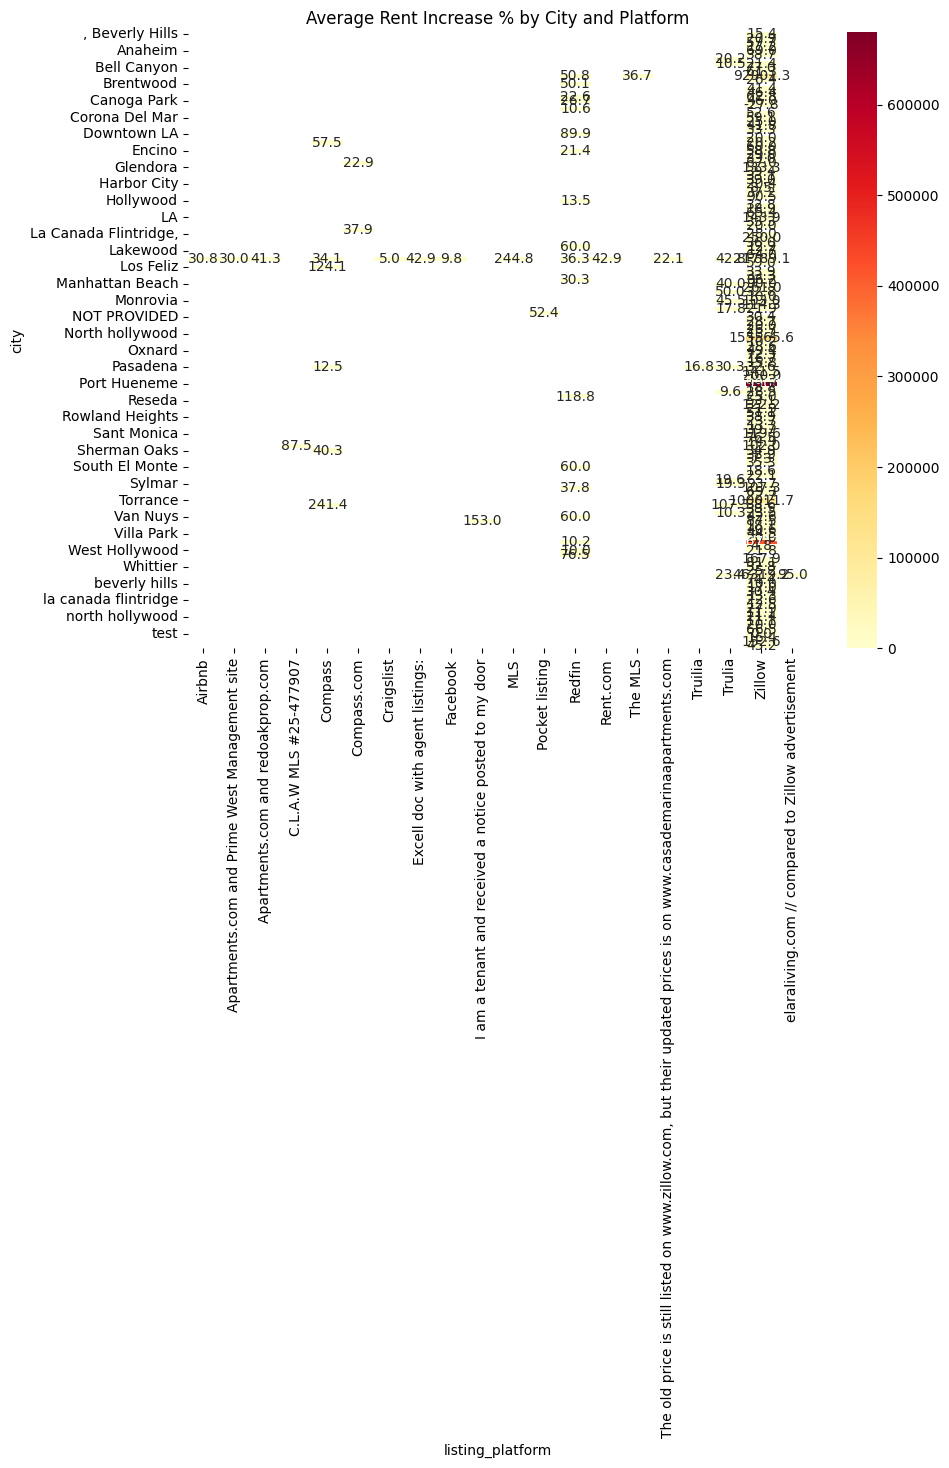

In [47]:
t_stat, p_value = stats.ttest_rel(df['current_rent'], df['previous_rent'])
print(f"Paired t-test results: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")

# 5. Advanced Visualizations
# Rent increase heatmap by city and listing platform
pivot_table = pd.pivot_table(df, 
                            values='price_increase_pct',
                            index='city',
                            columns='listing_platform',
                            aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Average Rent Increase % by City and Platform')
plt.show()